# Best Neghborhood for Computer Science Graduates #
For our metric we took the three most important aspects of a neighborhood to each of us individually, amount of smart trash cans, number of fish fry locations, and percent of single people per neighborhood. We each individually ranked the neighborhoods based on our metrics then combined them all into one dataframe. This data frame was then used to cross refrence our rankings and eventually determine the best neighborhood in pittsburgh.

![cowboy](https://media.giphy.com/media/nGMnDqebzDcfm/giphy.gif)

# Analysis of Pittsburgh Nieghborhoods by Single People #

Benson : For my chosen data set I thought it would be funny to find the "most single" neighborhood in pittsburgh. Once I had located my dataset I imported it, and slimmed down the dataframe to only include the variables I would need

In [1]:
import pandas as pd
import geopandas

# Reads in the "housing" dataset into variable csv #
csv = pd.read_csv("housing_dat.csv")

# Transforms csv to a dataFrame (stored in variable "datFrame") #
datFrame = pd.DataFrame(csv)

# Slims down the two variables we will be looking at and makes new dataframes for it #
# This step isn't necessary but it makes the data easier on the eyes when viewing it #
singleFrame = datFrame[['Community', '%single_person']]
cougarFrame = datFrame[['Community', '%single_parent_family']]

# Shows the singles dataframe to make sure we didn't mess up #
singleFrame.head()

,Community,%single_person
0,Aleppo,15.0
1,Allegheny Center,61.0
2,Allegheny County,25.2
3,Allegheny West,30.0
4,Allentown,26.0


In [2]:
# Shows the "cougar data frame" to make sure we didn't mess up #
cougarFrame.head()

,Community,%single_parent_family
0,Aleppo,8.0
1,Allegheny Center,10.0
2,Allegheny County,14.1
3,Allegheny West,35.0
4,Allentown,21.0


### Mapping communities geographically ###
Now that the data sets are properly loaded into the program, I take it and merge it with the provided "neighborhood" .shape file so that we can get a nice visual!

In [3]:
# Neighborhoods "shape" file #
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")

# Merges the singles dataframe with the map #
singles_map = neighborhoods.merge(singleFrame, how='left', left_on='hood', right_on='Community')

# Merges the cougars dataframe with the map #
cougar_map = neighborhoods.merge(cougarFrame, how='left', left_on='hood', right_on='Community')

# Again we check to make sure the merge went smoothly #
singles_map[['hood','%single_person','geometry']].head()

,hood,%single_person,geometry
0,Central Oakland,37.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,63.0,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,36.0,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,46.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,43.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


In [4]:
# Checking the cougar map to make sure the merge went as planned #
cougar_map[['hood','%single_parent_family','geometry']].head()

,hood,%single_parent_family,geometry
0,Central Oakland,10.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,5.0,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,38.0,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,27.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,28.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


### Mapping without legend ###
This section follows lab 9 just as the previous few have. I check the data maps to make sure that they're correct and plot them. Although without the legend showing how the colors correspond with the "density" values, it doesn't mean too much.

<AxesSubplot:>

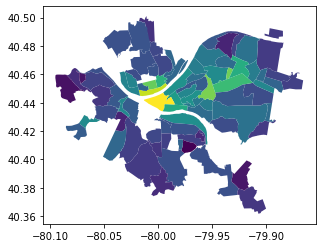

In [5]:
singles_map.plot(column='%single_person')

<AxesSubplot:>

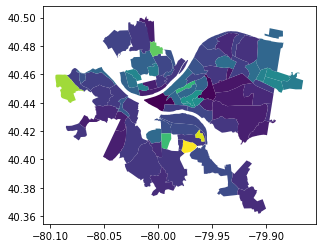

In [6]:
cougar_map.plot(column='%single_parent_family')

## Map of sinlges in your area

Now we add the legend and different color values for the varying levels of "singles" in that particular neighborhood which leaves us with a very nice colorized map of pittsburgh. Hot spots of single people can then be analyzed based off of this.

<AxesSubplot:>

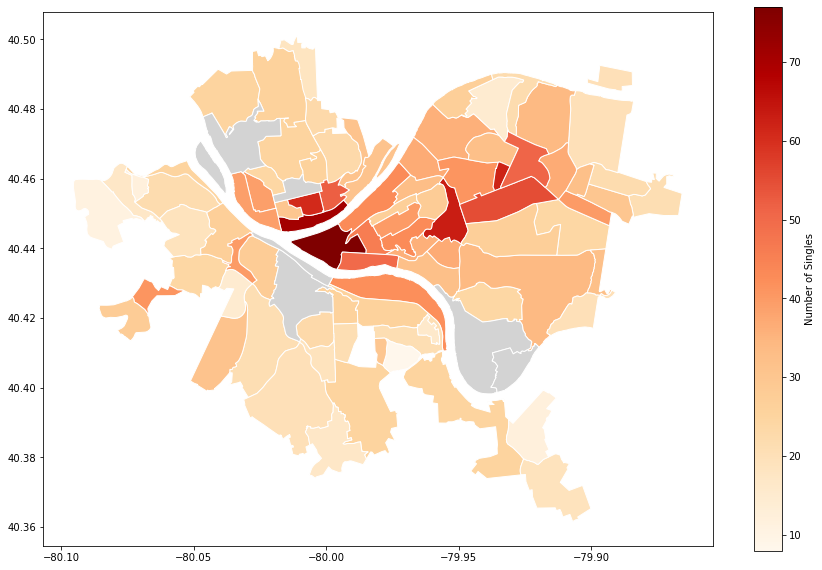

In [7]:
singles_map.plot(column='%single_person', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Singles"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

## Map of single moms in your area ##
Okay so now that we have the data loaded correctly for singles, lets do the same for the "%single_parent_family" dataframe.

<AxesSubplot:>

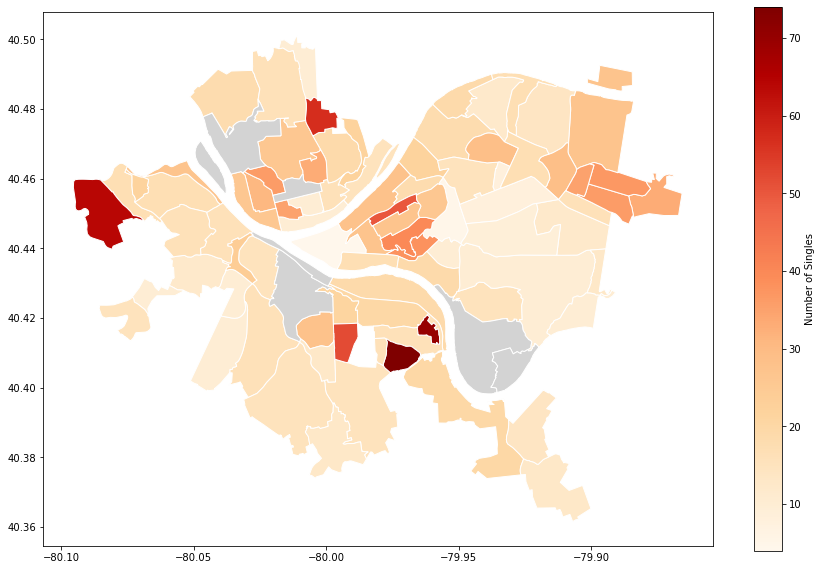

In [8]:
cougar_map.plot(column='%single_parent_family', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Singles"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

### Interpreting map data into plain text ###
Next I took the plain dataframes, holding all of the data, and found the maximum single parent percentages and the maximum single person percentages. Then I took this knowledge and located the names of said neighborhoods!

In [9]:
# Finding the max % of singles and single parent families #
max_single_percent = str(singleFrame['%single_person'].max())
max_single_parent_percent = str(cougarFrame['%single_parent_family'].max())

# Finding the ID/Index of the max singleperson and max singleparentfamily #
singleID = singleFrame['%single_person'].idxmax()
singleParentID = cougarFrame['%single_parent_family'].idxmax()

# Locates the name of each max % communities
mostSingle = singleFrame.iloc[singleID, 0]
mostSingleParent = cougarFrame.iloc[singleParentID, 0]

# Prints the names of the most single communities
print("maximum single % " + max_single_percent + " " + mostSingle)
print("maximum single parent % " + max_single_parent_percent + " " + mostSingleParent)

maximum single % 77.0 Central Business District
maximum single parent % 74.0 St. Clair


### Most single person neighborhood : Central Buisness District ###
### Most single parent neighborhood : St.Clair ###
Now that I knew each individual variables maximum percentage and neighborhood label, we can move on to how I determined the best overall neighborhood for single people. I first took the two datasets and combined them into one. This new dataset was then used to average the single parent percentages, and the single person percentages to find the overall "single percentage". This was then used to find the index, name, and percentage of the neighborhood with the most single people in Pittsburgh. 

In [11]:
# Combines the "single person %" data and the " single parent family %" together into one dataframe so we can take the average
combinedDat = pd.concat([singleFrame, datFrame[['%single_parent_family']]], axis = 1)

# Adds a column "avg" which holds the overall average single %
combinedDat['avg'] = combinedDat.mean(axis=1)

# Finds the highest average percent of single people and single parent families
maximumSinglePercent = combinedDat.max()

# Locates the name of the neighborhood with the highest average percent of singles
percent = combinedDat['avg'].max()
neighborhood = combinedDat.iloc[combinedDat['avg'].idxmax(), 0]

print("The most single neighborhood in Pittsburgh is " + neighborhood + "\nwith an average single percentage of " + str(percent) + " percent of the area being single")

# Presents the final sorted data frame to be used in the final conclusion #
combinedDat.sort_values(by='avg', ascending=False).reset_index().drop(labels='index', axis= 1)

The most single neighborhood in Pittsburgh is Arlington Heights
with an average single percentage of 43.0 percent of the area being single


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


,Community,%single_person,%single_parent_family,avg
0,Arlington Heights,16.0,70.0,43.00
1,Terrace Village,43.0,40.0,41.50
2,St. Clair,8.0,74.0,41.00
3,Central Business District,77.0,4.0,40.50
4,North Shore,71.0,10.0,40.50
...,...,...,...,...
213,Churchill,8.0,8.0,8.00
214,Thornburg,8.0,7.0,7.50
215,Franklin Park,8.1,5.6,6.85
216,Fox Chapel,7.0,5.0,6.00


# The final answer #
The most single neighborhood in Pittsburgh is Arlington Heights with an average of **43%** of residents being single.


![nice](https://media.giphy.com/media/huyVJYSKcArLiu8J5g/giphy.gif)

# Breakdown of population of smart trash containers

I chose the dataset of smart trash containres locations. Newly computer science graudates are always trying to use new tech, and why not smart trash containers?

In [12]:
import pandas as pd
import geopandas

csv = pd.read_csv("city.csv")
dataFrame = pd.DataFrame(csv)

dataFrame.head()

,container_id,receptacle_model_id,assignment_date,last_updated_date,group_name,address,city,state,zip,neighborhood,dpw_division,council_district,ward,fire_zone,x,y
0,1,74,2017-09-14T13:24:40,2021-11-30T02:17:19,1st Division,122 E North Ave,Pittsburgh,Pennsylvania,15212,Central Northside,1.0,1.0,22.0,1-6,-80.004018,40.456073
1,3,74,2017-09-14T13:24:40,2021-11-25T13:29:21,1st Division,1300 Federal St,Pittsburgh,Pennsylvania,15212,Central Northside,1.0,1.0,22.0,1-6,-80.006872,40.456625
2,4,74,2017-09-14T13:24:40,2021-11-30T02:19:36,1st Division,110 Federal St,Pittsburgh,Pennsylvania,15212,Allegheny Center,1.0,1.0,22.0,1-6,-80.006250,40.454520
3,5,74,2017-09-19T12:22:45,2021-11-30T07:05:17,1st Division,490 E North Ave,Pittsburgh,Pennsylvania,15212,Central Northside,1.0,1.0,22.0,1-6,-80.002083,40.456444
4,6,74,2017-09-19T12:22:46,2021-11-30T11:05:21,1st Division,1501 Brighton Rd,Pittsburgh,Pennsylvania,15212,California-Kirkbride,1.0,6.0,25.0,1-21,-80.015758,40.457025


### Manipulating the data frame

The dataset contains all the smart trash containers and tells us which neighborhood they are in. This is great! Although, we need to know the amount of smart trash containers in each neighborhood to accurately pick the best neighborhood for computer science graduates.

Here, I am looping through all the neighborhoods and keeping track of how many times each neighborhood shows up.

In [13]:
neighborhoodCount = {}

for n in dataFrame.neighborhood:
    # For some reason one of the blank neighborhoods were of type float
    if isinstance(n, float): continue
    
    if not n in neighborhoodCount:
        neighborhoodCount[n] = 1
        continue
    neighborhoodCount[n] += 1

neighborhoodDataFrame = pd.DataFrame({"neighborhoods":neighborhoodCount.keys(), "count":neighborhoodCount.values()})
print(neighborhoodDataFrame)

               neighborhoods  count
0          Central Northside      9
1           Allegheny Center      7
2       California-Kirkbride      4
3         Marshall-Shadeland     15
4                 Manchester      6
..                       ...    ...
74  Lincoln-Lemington-Belmar      6
75             Homewood West      4
76       Upper Lawrenceville     16
77           Stanton Heights      2
78            Swisshelm Park      1

[79 rows x 2 columns]


### Merging the data to make it pretty

Now that we have the amount of smart trash containers in each neighborhood, we can now map all that data to the map of Pittsburgh. Doing this will easily produce a bunch of polygons that correspond to the neighborhoods.

In [15]:
city = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
mapMerge = city.merge(neighborhoodDataFrame, how="left", left_on="hood", right_on="neighborhoods")
mapMerge.head()

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,plannerass,created_us,created_da,last_edite,last_edi_1,Shape__Are,Shape__Len,geometry,neighborhoods,count
0,1,0.0,42,003,040500,1,420030405001,Block Group 1,G5030,S,...,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,7.842997e+06,11525.904546,"POLYGON ((-79.95304 40.44203, -79.95302 40.442...",Central Oakland,39.0
1,2,1.0,42,003,040400,1,420030404001,Block Group 1,G5030,S,...,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.390469e+07,20945.562570,"POLYGON ((-79.95455 40.45882, -79.95427 40.458...",North Oakland,15.0
2,3,2.0,42,003,040200,2,420030402002,Block Group 2,G5030,S,...,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,5.998649e+06,18280.484515,"POLYGON ((-79.96230 40.44294, -79.96220 40.442...",West Oakland,9.0
3,4,3.0,42,003,030500,2,420030305002,Block Group 2,G5030,S,...,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,7.203337e+06,15697.914337,"POLYGON ((-79.98275 40.44641, -79.98273 40.446...",Crawford-Roberts,22.0
4,5,5.0,42,003,020300,1,420030203001,Block Group 1,G5030,S,...,Andrea Lavin Kossis,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.694875e+07,24019.532672,"POLYGON ((-79.97494 40.45629, -79.97484 40.456...",Strip District,41.0


### Visualizing our data

Now that we have merged our data, we can now see each neighborhood in Pittsburgh.

<AxesSubplot:>

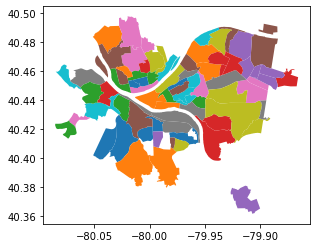

In [17]:
mapMerge.plot(column="neighborhoods")

### Mapping our count to the map

Looking at all the neighborhoods is cool, but now we want to create a heat map to make it easy for people to see roughly the amount of smart trash containers in each neighborhood.

<AxesSubplot:>

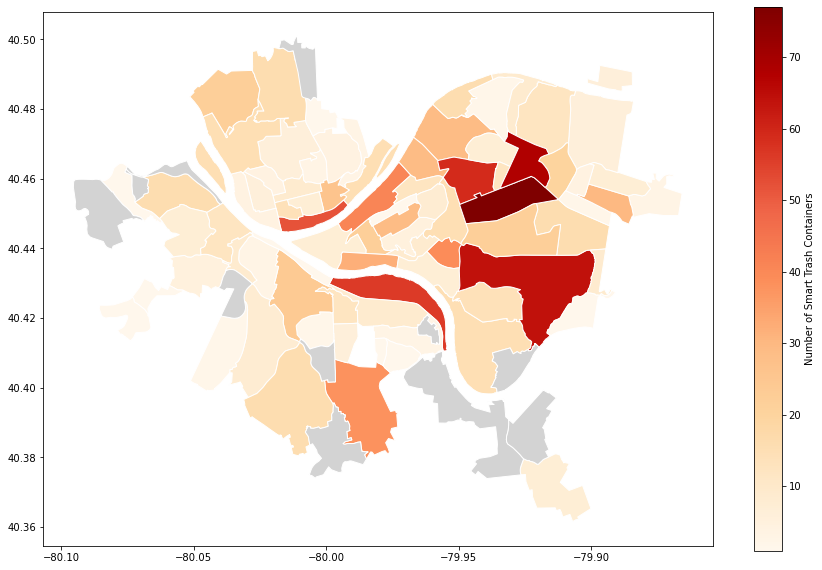

In [19]:
mapMerge.plot(column='count', 
       cmap='OrRd', 
       edgecolor="white", 
       legend=True, 
       figsize=(15, 10), 
       missing_kwds={"color": "lightgrey"},
       legend_kwds={'label': "Number of Smart Trash Containers"})

### Leaderboard

Now that we plotted our heat map, we want to pinpoint the top neighborhoods. To do this, we need to sort all of the neighborhoods is descending order.

In [20]:
sortedNeighborhoods = sorted(neighborhoodCount.items(), key=lambda x: x[1], reverse=True)

for i in range(5):
    print(f"{i+1}) {sortedNeighborhoods[i][0]}: {sortedNeighborhoods[i][1]}")

maxAmt = sortedNeighborhoods[0]
minAmt = sortedNeighborhoods[len(sortedNeighborhoods)-1]
print(f'Neighborhood with the most amount of smart trash containers is {maxAmt[0]} with {maxAmt[1]}')
print(f'Neighborhood with the least amount of smart trash containers is {minAmt[0]} with {minAmt[1]}')

1) Shadyside: 77
2) East Liberty: 68
3) Squirrel Hill South: 64
4) Bloomfield: 59
5) South Side Flats: 56
Neighborhood with the most amount of smart trash containers is Shadyside with 77
Neighborhood with the least amount of smart trash containers is Swisshelm Park with 1


## Fish Fry Locations in Pittsburgh
One of the most important things a computer science student can get to function well and succeed is some great food, so I chose a dataset containing a comprehensive list of Fish Fry resturants and their locations in Pittsburgh to rank which neighborhoods you could get the best food in.

### Step 1: Getting Our Data

In [21]:
import numpy as np
import pandas as pd
import geopandas as geo
import matplotlib.pyplot as plt

# Load in our data
csv = pd.read_csv("ResturantData.csv")

# Display
resturantData = pd.DataFrame(csv)
resturantData.head()

,validated,venue_name,venue_type,venue_address,website,events,etc,menu_url,menu_text,venue_notes,...,email,homemade_pierogies,take_out,alcohol,lunch,handicap,publish,id,latitude,longitude
0,False,Holy Cross (Reilly Center),Church,"7100 West Ridge Road, Fairview, PA",https://www.holycrossfairview.org,NaN,NaN,NaN,No Fish Fry at this time,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,42.039710,-80.245022
1,True,Hartford Heights Volunteer Fire Department,Fire Department,"14335 U.S. 30, Irwin, PA 15642",https://www.facebook.com/Hartford-Heights-VFD-...,"Friday Feb 19 from 4:00 PM to 8:00 PM, Friday ...",NaN,NaN,NaN,NaN,...,NaN,False,True,NaN,False,NaN,True,NaN,40.352969,-79.767295
2,True,"Our Lady of Joy, Holiday Park",Church,"2000 O'Block Road Holiday Park, PA",https://holyfamilypgh.org/,"Wednesday Feb 17 from 4:00 PM to 7:00 PM, Frid...",Lunch is 11am-1pm.,NaN,"Menu: beer battered, fried/baked or gluten fre...",NaN,...,NaN,False,True,NaN,False,NaN,True,NaN,40.480007,-79.719563
3,True,St. John Benwood,Church,"700 Main Street, Benwood, West Virginia 26031,...",https://www.facebook.com/stjohnparishbenwoodwv/,"Friday Feb 26 from 11:00 AM to 6:00 PM, Friday...",NaN,https://www.facebook.com/stjohnparishbenwoodwv...,NaN,St John Benwood Fellowship Hall,...,NaN,False,True,NaN,True,NaN,True,NaN,40.016004,-80.734844
4,True,Historic Church of St. Peter,Church,"118 Church Street, Brownsville, Pennsylvania 1...",http://www.stpeterstcecilia.org/home-2,"Wednesday Feb 17 from 11:00 AM to 2:00 PM, Wed...",NaN,http://www.stpeterstcecilia.org/bulletins,See menu link,NaN,...,NaN,True,True,NaN,True,NaN,True,NaN,40.023986,-79.881267


#### This dataset has a lot of unnescesary information, lets clean it up to just what we need.

In [22]:
# Clear up our data for what we need
resturantData = resturantData[["venue_name", "venue_address", "latitude", "longitude", "homemade_pierogies"]]
resturantData.head()

,venue_name,venue_address,latitude,longitude,homemade_pierogies
0,Holy Cross (Reilly Center),"7100 West Ridge Road, Fairview, PA",42.039710,-80.245022,NaN
1,Hartford Heights Volunteer Fire Department,"14335 U.S. 30, Irwin, PA 15642",40.352969,-79.767295,False
2,"Our Lady of Joy, Holiday Park","2000 O'Block Road Holiday Park, PA",40.480007,-79.719563,False
3,St. John Benwood,"700 Main Street, Benwood, West Virginia 26031,...",40.016004,-80.734844,False
4,Historic Church of St. Peter,"118 Church Street, Brownsville, Pennsylvania 1...",40.023986,-79.881267,True


#### Getting neighborhoods
Unfortunetly, this dataset did not include neighborhoods but rather a longitude and latitude for each locations, which is not very helpful for us by itself. So I imported a python geography library and used it to pull the neighborhood from each longitude and latitude. This code did take a few minutes to run, so I filled all of this data into a text file so I could use it later on and more efficiently.

In [25]:
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

geolocator = Nominatim(user_agent="example app")

print("Starting")
for index, row in resturantData.iterrows():
    lat = row["latitude"]
    long = row["longitude"]
    hasPierogies = row["homemade_pierogies"]
    
    coordinates = str(lat) + ", " + str(long)
    location = geolocator.reverse(coordinates)
    
    # Make sure we're in Pittsburgh
    try:
        city = location.raw['address']['city']
        if (city != "Pittsburgh"):
            continue
    except:
        continue
    
    try:
        n = location.raw['address']['neighbourhood']
        print(n)
        if (hasPierogies):
            print("Pierogies: " + n) # Extra point for having pierogies
    except:
        print("MISSING")
        
print("Finished")

Starting
Mount Washington
Windgap
Pierogies: Windgap
Troy Hill
Pierogies: Troy Hill
Downtown
Pierogies: Downtown
East Allegheny
Pierogies: East Allegheny
Downtown
South Side Flats
Pierogies: South Side Flats
Brookline
Pierogies: Brookline
Elliott
Pierogies: Elliott
Downtown
Pierogies: Downtown
MISSING
Morningside
Pierogies: Morningside
South Side Flats
Pierogies: South Side Flats
Elliott
Beechview
Pierogies: Beechview
Glenwood
Pierogies: Glenwood
Strip District
Pierogies: Strip District
South Side Flats
Four Mile Run
Pierogies: Four Mile Run
Perry North
Morningside
East Liberty
Pierogies: East Liberty
South Side Flats
Pierogies: South Side Flats
MISSING
Shadyside
Pierogies: Shadyside
Westwood
Pierogies: Westwood
Squirrel Hill North
Pierogies: Squirrel Hill North
South Side Slopes
Pierogies: South Side Slopes
Finished


### Step 2: Making Sense of Our Data
Now that I had all of the nescesary data, the first step was to grade each neighborhood based on the resturant data. For this each neighborhood started off with a basic score of 1 and was given an extra point for each fish fry resturant they had.

In [27]:
communityFishFryCount = {}

# Parsing our now stored neighborhood data
with open("Neighborhoods.txt") as file:
    neighborhoods = file.readlines()
    
for i in range(len(neighborhoods)):
    community = neighborhoods[i].replace('\n', '')
    communityFishFryCount[community] = 1
    
# Load in our neighborhood fish fry data
neighborhoodData = list("")
with open("FishFryNeighborhoodData.txt") as file:
    fishFryData = file.readlines()

for i in range(len(fishFryData)):
    fishFryData[i] = fishFryData[i].replace('\n', '')
    fishFryData[i] = fishFryData[i].replace(',', '')

# Add points to our dictionary, each resturant a neighborhood has gives it a point
for community in fishFryData:
    if community in communityFishFryCount:
        communityFishFryCount[community] += 1

Some of these locations also offered homemade pierogies, so each location that had this was given an extra point.

In [28]:
# Load in our neighborhood pierogi data
neighborhoodData = list("")
with open("PierogiNeighborhoodData.txt") as file:
    neighborhoodData = file.readlines()
    
for i in range(len(neighborhoodData)):
    neighborhoodData[i] = neighborhoodData[i].replace('\n', '')
    neighborhoodData[i] = neighborhoodData[i].replace(',', '')

# Add points to our dictionary
for community in neighborhoodData:
    if community in communityFishFryCount:
        communityFishFryCount[community] += 1

#### Visualizing Our Data
Now that we have all of our data organized, lets plot it onto a map of Pittsburgh.

<AxesSubplot:>

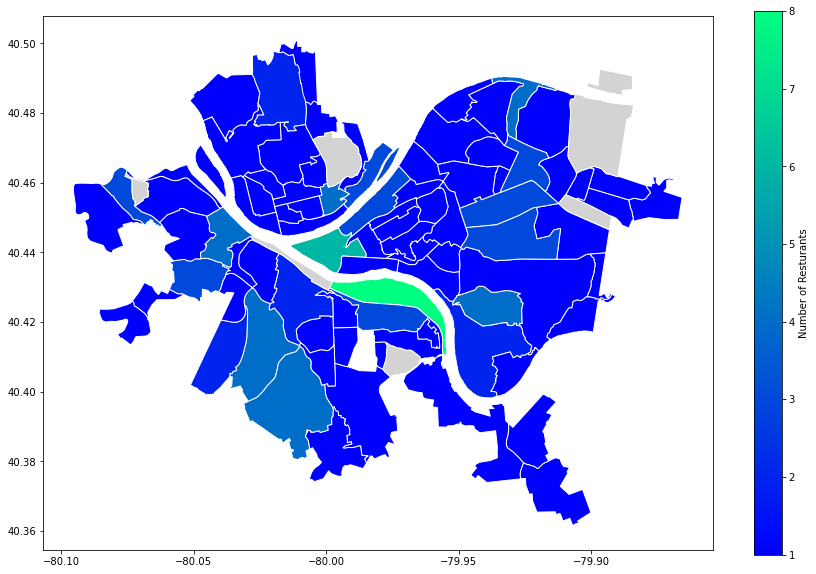

In [30]:
# Plot  our data using our dictionary
df = pd.DataFrame({"neighborhoods":communityFishFryCount.keys(), "count":communityFishFryCount.values()})
city = geo.read_file("Neighborhoods/Neighborhoods_.shp")
m = city.merge(df, how="left", left_on="hood", right_on="neighborhoods")

m.plot(column='count', 
       cmap='winter', 
       legend=True, 
       figsize=(15, 10), 
       missing_kwds={"color": "lightgrey"},
       edgecolor = "white",
       legend_kwds={'label': "Number of Resturants"})

### Step 3: Analysing Our Data
This data is good, but there is one problem. Many places, like Downtown, might have a lot of locations but also be a very crowded and heavily visited area. In order to account for this, I found another dataset that contained an average daily traffic amount for each neighborhood and used it to scale each neighborhoods score.

In [31]:
communityFinalCount = {}
communityTrafficCount = {}

# Loading in our data
csv = pd.read_csv("TrafficData.csv")

# Cleaning up the dataframe for what we need
trafficData = pd.DataFrame(csv)
trafficData = trafficData[["average_daily_car_traffic", "neighborhood"]]
trafficData = trafficData.dropna()

# For each item, add it to our dictionary for late use
for index, row in trafficData.iterrows():
    trafficCount = row["average_daily_car_traffic"]
    neighborhood = row["neighborhood"]
    
    if (trafficCount <= 0): continue
    
    if not neighborhood in communityTrafficCount:
        communityTrafficCount[neighborhood] = trafficCount

# Scale each neighborhoods data down
for key, value in communityFishFryCount.items():
    if key in communityTrafficCount:
        communityFinalCount[key] = int(communityFishFryCount[key] * 1000 / communityTrafficCount[key])
    else:
        communityFinalCount[key] = int(communityFishFryCount[key])

# Normalize our data so the top neighborhood's score is 100 and all the other neighborhoods ar scaled to that
communityFinalCount = dict(sorted(communityFinalCount.items(), key=lambda item: item[1], reverse = True))
highestValue = communityFinalCount[max(communityFinalCount, key=communityFinalCount.get)]

for key, value in communityFinalCount.items():
    communityFinalCount[key] = int((communityFinalCount[key] / (highestValue)) * 100)

#### Now lets display our final data

<AxesSubplot:>

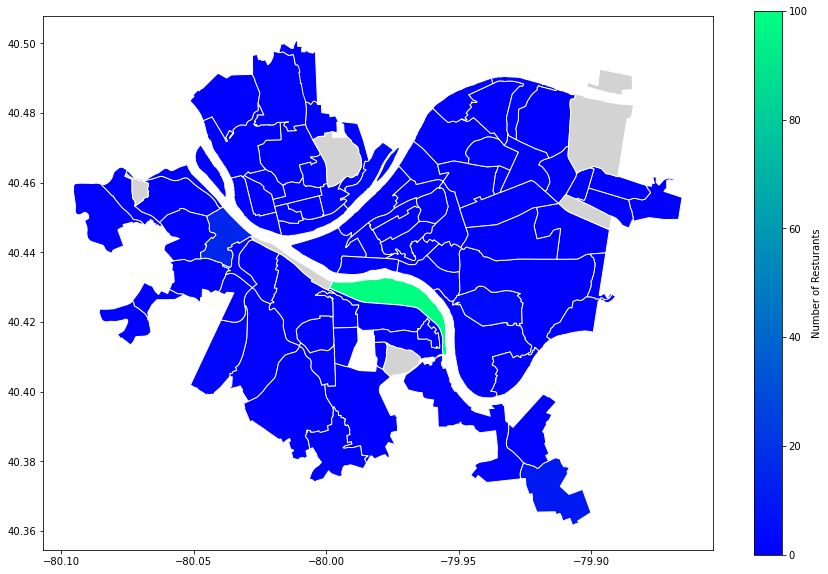

In [33]:
df = pd.DataFrame({"neighborhoods":communityFinalCount.keys(), "count":communityFinalCount.values()})
city = geo.read_file("Neighborhoods/Neighborhoods_.shp")
m = city.merge(df, how="left", left_on="hood", right_on="neighborhoods")

m.plot(column='count', 
       cmap='winter', 
       legend=True, 
       figsize=(15, 10), 
       missing_kwds={"color": "lightgrey"},
       edgecolor = "white",
       legend_kwds={'label': "Number of Resturants"})

### Conclusion
Because South Side Flats was already in the lead for the resturant count and barely got an traffic, it became the clear leader.

In [60]:
# Printing out our data

count = 0
for key, value in communityFinalCount.items():
    count += 1
    print(key + " had a score of " + str(value))
    if (count >= 5): break

South Side Flats had a score of 100
Elliott had a score of 15
Lincoln Place had a score of 10
Greenfield had a score of 5
Troy Hill had a score of 4


# Conclusion

Now that we have the five best neighborhoods in each dataset, it is time to put it all together and determine the best Pittsburgh neighborhood to live as a computer science graduate. First I added up all the neighborhoods in the place they appeared in each list. For example, South Side Flats, the first entry, was placed 1st in the fish fry dataset and 5th in the smart trash containers dataset. This yeilds a score of 6.

For our final results, we decided to only pick from our combined top 5. The worst neighborhood will still have some elements of at least one of the datasets.

In [116]:
# Dict of neighborhoods scores
neighborhoods = {}

# Taking each of our dataframes and putting them into a list of their top 5
# For these 2 dataframes, we are sorting their rows, then taking their values and casting it to a list to its easier to work with
stcDataFrame = neighborhoodDataFrame.sort_values(by='count', ascending=False).reset_index().drop(labels='index', axis= 1).head(5).values.tolist()
singlesDataFrame = combinedDat.sort_values(by='avg', ascending=False).reset_index().drop(labels='index', axis= 1).head(5).values.tolist()
# Turning the food dict that is sorted already into a dataframe and then to an array to match the format the others are in
foodDataFrame = pd.DataFrame({"neighborhoods":communityFinalCount.keys(), "count":communityFinalCount.values()}).head(5).values.tolist()

# combine the arrays to make it easier to calculate the values
arr = stcDataFrame + foodDataFrame + singlesDataFrame

# loop through the array and give each neighborhood a value
for i in range(len(arr)):
    currEntry = arr[i][0]
    # Here we are calculating the value we should give to each neighborhood 0 -> 5, 1 -> 4, 2 -> 3, etc.
    # This works because the array im working with is each of our top 5 neighborhoods in order. This makes sense if you look at an example array:
    # [ a1, a2, a3, a4, a5, b1, b2, b3, b4, b5, c1, c2, c3, c4, c5 ]
    # We will give 5 ( 5 - 0 % 5 ), since the the index for each first palce will be 0, points to each neighborhood that is ranking #1 in their respective category 
    # and so on for each neighborhood in each category. 
    v = 5 - i % 5
    if not currEntry in neighborhoods:
        neighborhoods[currEntry] = v
        continue
    neighborhoods[currEntry] += v

# Take the average of each category
avgs = {}
for i in neighborhoods.keys():
    avgs[i] = round(neighborhoods[i] / 3, 2)

# Sort them and show results
sortedAvgs = sorted(avgs.items(),  key=lambda x: x[1], reverse=True)
for i in range(5):
    print(f"{i+1}) {sortedAvgs[i][0]}: {sortedAvgs[i][1]}")

print(f"\033[92m\033[1m{sortedAvgs[i][0]} \033[0mis the best neighborhood to live in as a computer science graduate!")
print(f"\033[91m\033[1m{sortedAvgs[len(sortedAvgs)-1][0]} \033[0mis the worst neighborhood for computer science graduates.")

1) South Side Flats: 2.0
2) Shadyside: 1.67
3) Arlington Heights: 1.67
4) East Liberty: 1.33
5) Elliott: 1.33
Elliott is the best neighborhood to live in as a computer science graduate!
North Shore is the worst neighborhood for computer science graduates.
